using the optimisers, callbacks and learning rates


Use all the following optimisers:


1) SGD + Momentum

2) Nesterov Accelerated Gradient Descent

3) RMSprop

4) Adam

5) Nadam


train your model for each optimiser for 20 epochs and define all the callbacks (checkpoint, earlystopping, reducedLRonplateau) on your model and check its performance. Adjust the learning rates and observe the changes and display them into your notebook.

In [1]:
from __future__ import print_function
import os
import cv2
import pandas as pd
import numpy as np
from os import listdir
import glob
import matplotlib.pyplot as plt


In [2]:
os.chdir('F:/Data_Trained/Flip robo/flipkart')

In [5]:
# Sharpening
kernel_sharpening=np.array([[-1,-1,-1],
                           [-1,9,-1],
                           [-1,-1,-1]])

In [54]:
data=[]
data1=[]

In [55]:
image_dir=('F:/Data_Trained/Flip robo/flipkart/Augmented/Jeans') # Enter Directory of all images 
data_path = os.path.join(image_dir,'*g')
files = glob.glob(data_path)
for f1 in files:
    img = cv2.imread(f1)
    height,width=img.shape[:2]
    rotation_matrix=cv2.getRotationMatrix2D((width/2,height/2),25,0.6)
    rotation_matrix1=cv2.getRotationMatrix2D((width/2,height/2),-20,0.6)
    M=np.ones(img.shape,dtype="uint8")*75
    rotated_image=cv2.warpAffine(img,rotation_matrix,(width,height))
    data.append(rotated_image)
    rotated_image1=cv2.warpAffine(img,rotation_matrix1,(width,height))
    data.append(rotated_image1)
    added=cv2.add(img,M)
    data.append(added)
    subtracted=cv2.subtract(img,M)
    data.append(subtracted)
    sharpened=cv2.filter2D(img,-1,kernel_sharpening)
    data.append(sharpened)
    flipped=cv2.flip(img,0)
    data.append(flipped)
    height,width=0,0
    M=0
    

In [56]:
len(data)

480

In [57]:
num=0
for image in data:
    cv2.imwrite(str(num)+".jpeg",image)
    num=num+1

In [58]:
image_dir=('F:/Data_Trained/Flip robo/flipkart/Augmented/Trouser') # Enter Directory of all images 
data_path = os.path.join(image_dir,'*g')
files = glob.glob(data_path)
data1 = []
for f1 in files:
    img = cv2.imread(f1)
    height,width=img.shape[:2]
    rotation_matrix=cv2.getRotationMatrix2D((width/2,height/2),25,0.6)
    rotation_matrix1=cv2.getRotationMatrix2D((width/2,height/2),-20,0.6)
    M=np.ones(img.shape,dtype="uint8")*75
    rotated_image=cv2.warpAffine(img,rotation_matrix,(width,height))
    data1.append(rotated_image)
    rotated_image1=cv2.warpAffine(img,rotation_matrix1,(width,height))
    data1.append(rotated_image1)
    added=cv2.add(img,M)
    data1.append(added)
    subtracted=cv2.subtract(img,M)
    data1.append(subtracted)
    sharpened=cv2.filter2D(img,-1,kernel_sharpening)
    data1.append(sharpened)
    flipped=cv2.flip(img,0)
    data1.append(flipped)
    height,width=0,0
    M=0

In [59]:
len(data1)

480

In [60]:
num=0
for image in data1:
    cv2.imwrite(str(num)+".jpeg",image)
    num=num+1

In [3]:
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Activation,Dropout,Flatten,Dense
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Conv2D, MaxPooling2D,ZeroPadding2D
from keras.models import load_model
from keras import optimizers
import scipy
import pylab as pl
import matplotlib.cm as cm
%matplotlib inline

C:\anaconda\envs\py36_test\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\anaconda\envs\py36_test\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\anaconda\envs\py36_test\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\anaconda\envs\py36_test\lib\site-packages\tensorflow\python\framework\dtypes.py:519: FutureWarnin

In [4]:
input_shape=(150,150,3)
input_width=150
input_height=150

In [5]:
nb_train_samples=480
nb_validation_samples=44
batch_size=20


In [6]:
train_data_dir='F:/Data_Trained/Flip robo/flipkart/Train_augmnt'

In [7]:
test_data_dir='F:/Data_Trained/Flip robo/flipkart/Test'

In [8]:
# rescale the pixel values from [0,255] to [0,1] interval
datagen=ImageDataGenerator(rescale=1./255)

In [9]:
validation_datagen=ImageDataGenerator(rescale=1./255)

In [10]:
# retreive images and their classes for train and validation sets
train_generator=datagen.flow_from_directory(
                         train_data_dir,target_size=(input_width,input_height),
                          batch_size=10,class_mode='binary',shuffle=True)

Found 960 images belonging to 2 classes.


In [11]:
validation_generator=datagen.flow_from_directory(
                         test_data_dir,target_size=(input_width,input_height),
                          batch_size=10,class_mode='binary',shuffle=False)

Found 40 images belonging to 2 classes.


In [12]:
model=Sequential()
model.add(Conv2D(32,(3,3),input_shape=input_shape))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.5))
model.add(Conv2D(32,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.5))
model.add(Conv2D(64,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(1))
model.add(Activation('sigmoid'))
print(model.summary())


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
activation_1 (Activation)    (None, 148, 148, 32)      0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 72, 72, 32)        9248      
_________________________________________________________________
activation_2 (Activation)    (None, 72, 72, 32)        0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 36, 36, 32)      

# UsingADAM

In [14]:
from keras.optimizers import Adam
from keras.callbacks import ModelCheckpoint,EarlyStopping, ReduceLROnPlateau

In [22]:
checkpoint=ModelCheckpoint('F:/Data_Trained/Flip robo/flipkart/jeans_trouser_rms_cnn.h5',monitor='val_loss',
                          mode='min',
                          save_best_only=True,
                          verbose=1)
earlystop=EarlyStopping(monitor='val_loss',min_delta=0,
                       patience=3,
                       verbose=1,
                       restore_best_weights=True)
reduce_lr=ReduceLROnPlateau(monitor='val_loss',
                           factor=0.2,
                           patience=3,
                           verbose=1,
                           min_delta=0.0001)
callbacks=[earlystop,checkpoint,reduce_lr]

In [23]:
model.compile(loss='binary_crossentropy',optimizer=Adam(learning_rate=0.01),metrics=['accuracy'])

In [24]:
history=model.fit_generator(train_generator,steps_per_epoch=nb_train_samples//batch_size,
                           epochs=20,callbacks=callbacks,validation_data=validation_generator,
                           validation_steps=nb_validation_samples//batch_size)

Epoch 1/20
24/24 [==============================] - 21s 885ms/step - loss: 0.7138 - accuracy: 0.5458 - val_loss: 0.6825 - val_accuracy: 1.0000

Epoch 00001: val_loss improved from inf to 0.68246, saving model to F:/Data_Trained/Flip robo/flipkart/jeans_trouser_cnn.h5
Epoch 2/20
24/24 [==============================] - 19s 800ms/step - loss: 0.6954 - accuracy: 0.4917 - val_loss: 0.6544 - val_accuracy: 1.0000

Epoch 00002: val_loss improved from 0.68246 to 0.65445, saving model to F:/Data_Trained/Flip robo/flipkart/jeans_trouser_cnn.h5
Epoch 3/20
24/24 [==============================] - 20s 838ms/step - loss: 0.7076 - accuracy: 0.4708 - val_loss: 0.7067 - val_accuracy: 0.0000e+00

Epoch 00003: val_loss did not improve from 0.65445
Epoch 4/20
24/24 [==============================] - 61s 3s/step - loss: 0.6926 - accuracy: 0.5042 - val_loss: 0.7099 - val_accuracy: 0.0000e+00

Epoch 00004: val_loss did not improve from 0.65445
Epoch 5/20
24/24 [==============================] - 74s 3s/step -

# Using RMSprop

In [25]:
checkpoint=ModelCheckpoint('F:/Data_Trained/Flip robo/flipkart/jeans_trouser_rms_cnn.h5',monitor='val_loss',
                          mode='min',
                          save_best_only=True,
                          verbose=1)
earlystop=EarlyStopping(monitor='val_loss',min_delta=0,
                       patience=3,
                       verbose=1,
                       restore_best_weights=True)
reduce_lr=ReduceLROnPlateau(monitor='val_loss',
                           factor=0.2,
                           patience=3,
                           verbose=1,
                           min_delta=0.0001)
callbacks=[earlystop,checkpoint,reduce_lr]

In [27]:
model.compile(loss='binary_crossentropy',optimizer='rmsprop',metrics=['accuracy'])

In [28]:
history=model.fit_generator(train_generator,steps_per_epoch=nb_train_samples//batch_size,
                           epochs=20,callbacks=callbacks,validation_data=validation_generator,
                           validation_steps=nb_validation_samples//batch_size)

Epoch 1/20
24/24 [==============================] - 20s 836ms/step - loss: 0.6996 - accuracy: 0.4875 - val_loss: 0.6974 - val_accuracy: 0.0000e+00

Epoch 00001: val_loss improved from inf to 0.69736, saving model to F:/Data_Trained/Flip robo/flipkart/jeans_trouser_rms_cnn.h5
Epoch 2/20
24/24 [==============================] - 19s 789ms/step - loss: 0.6934 - accuracy: 0.5000 - val_loss: 0.6926 - val_accuracy: 1.0000

Epoch 00002: val_loss improved from 0.69736 to 0.69260, saving model to F:/Data_Trained/Flip robo/flipkart/jeans_trouser_rms_cnn.h5
Epoch 3/20
24/24 [==============================] - 21s 886ms/step - loss: 0.6914 - accuracy: 0.5250 - val_loss: 0.6947 - val_accuracy: 0.0000e+00

Epoch 00003: val_loss did not improve from 0.69260
Epoch 4/20
24/24 [==============================] - 22s 900ms/step - loss: 0.6964 - accuracy: 0.4667 - val_loss: 0.6929 - val_accuracy: 1.0000

Epoch 00004: val_loss did not improve from 0.69260
Epoch 5/20
24/24 [==============================] - 21

# SGD + Momentum

In [38]:
from keras.optimizers import SGD

In [39]:
checkpoint=ModelCheckpoint('F:/Data_Trained/Flip robo/flipkart/jeans_trouser_SGD_cnn.h5',monitor='val_loss',
                          mode='min',
                          save_best_only=True,
                          verbose=1)
earlystop=EarlyStopping(monitor='val_loss',min_delta=0,
                       patience=3,
                       verbose=1,
                       restore_best_weights=True)
reduce_lr=ReduceLROnPlateau(monitor='val_loss',
                           factor=0.2,
                           patience=3,
                           verbose=1,
                           min_delta=0.0001)
callbacks=[earlystop,checkpoint,reduce_lr]

In [40]:
model.compile(loss='binary_crossentropy',optimizer=SGD(lr=0.01),metrics=['accuracy'])

In [41]:
history=model.fit_generator(train_generator,steps_per_epoch=nb_train_samples//batch_size,
                           epochs=20,callbacks=callbacks,validation_data=validation_generator,
                           validation_steps=nb_validation_samples//batch_size)

Epoch 1/20
24/24 [==============================] - 22s 937ms/step - loss: 0.6921 - accuracy: 0.5167 - val_loss: 0.6936 - val_accuracy: 0.0000e+00

Epoch 00001: val_loss improved from inf to 0.69356, saving model to F:/Data_Trained/Flip robo/flipkart/jeans_trouser_SGD_cnn.h5
Epoch 2/20
24/24 [==============================] - 25s 1s/step - loss: 0.6946 - accuracy: 0.4958 - val_loss: 0.6921 - val_accuracy: 1.0000

Epoch 00002: val_loss improved from 0.69356 to 0.69206, saving model to F:/Data_Trained/Flip robo/flipkart/jeans_trouser_SGD_cnn.h5
Epoch 3/20
24/24 [==============================] - 19s 777ms/step - loss: 0.6918 - accuracy: 0.5542 - val_loss: 0.7004 - val_accuracy: 0.0000e+00

Epoch 00003: val_loss did not improve from 0.69206
Epoch 4/20
24/24 [==============================] - 19s 777ms/step - loss: 0.6931 - accuracy: 0.5083 - val_loss: 0.6853 - val_accuracy: 1.0000

Epoch 00004: val_loss improved from 0.69206 to 0.68527, saving model to F:/Data_Trained/Flip robo/flipkart/j

# using Nesterov Accelerated Gradient Descent

In [42]:
checkpoint=ModelCheckpoint('F:/Data_Trained/Flip robo/flipkart/jeans_trouser_SGD_nes_cnn.h5',monitor='val_loss',
                          mode='min',
                          save_best_only=True,
                          verbose=1)
earlystop=EarlyStopping(monitor='val_loss',min_delta=0,
                       patience=3,
                       verbose=1,
                       restore_best_weights=True)
reduce_lr=ReduceLROnPlateau(monitor='val_loss',
                           factor=0.2,
                           patience=3,
                           verbose=1,
                           min_delta=0.0001)
callbacks=[earlystop,checkpoint,reduce_lr]

In [43]:
model.compile(loss='binary_crossentropy',optimizer=SGD(lr=0.01,nesterov=True),metrics=['accuracy'])

In [44]:
history=model.fit_generator(train_generator,steps_per_epoch=nb_train_samples//batch_size,
                           epochs=20,callbacks=callbacks,validation_data=validation_generator,
                           validation_steps=nb_validation_samples//batch_size)

Epoch 1/20
24/24 [==============================] - 28s 1s/step - loss: 0.6937 - accuracy: 0.5083 - val_loss: 0.7036 - val_accuracy: 0.0000e+00

Epoch 00001: val_loss improved from inf to 0.70361, saving model to F:/Data_Trained/Flip robo/flipkart/jeans_trouser_SGD_nes_cnn.h5
Epoch 2/20
24/24 [==============================] - 34s 1s/step - loss: 0.6934 - accuracy: 0.4750 - val_loss: 0.6870 - val_accuracy: 1.0000

Epoch 00002: val_loss improved from 0.70361 to 0.68695, saving model to F:/Data_Trained/Flip robo/flipkart/jeans_trouser_SGD_nes_cnn.h5
Epoch 3/20
24/24 [==============================] - 22s 897ms/step - loss: 0.6941 - accuracy: 0.4875 - val_loss: 0.6991 - val_accuracy: 0.0000e+00

Epoch 00003: val_loss did not improve from 0.68695
Epoch 4/20
24/24 [==============================] - 19s 785ms/step - loss: 0.6937 - accuracy: 0.5000 - val_loss: 0.6824 - val_accuracy: 1.0000

Epoch 00004: val_loss improved from 0.68695 to 0.68240, saving model to F:/Data_Trained/Flip robo/flipk

# using nadam

In [46]:
from keras.optimizers import Nadam

In [47]:
checkpoint=ModelCheckpoint('F:/Data_Trained/Flip robo/flipkart/jeans_trouser_nadam_nes_cnn.h5',monitor='val_loss',
                          mode='min',
                          save_best_only=True,
                          verbose=1)
earlystop=EarlyStopping(monitor='val_loss',min_delta=0,
                       patience=3,
                       verbose=1,
                       restore_best_weights=True)
reduce_lr=ReduceLROnPlateau(monitor='val_loss',
                           factor=0.2,
                           patience=3,
                           verbose=1,
                           min_delta=0.0001)
callbacks=[earlystop,checkpoint,reduce_lr]

In [48]:
model.compile(loss='binary_crossentropy',optimizer=Nadam(lr=0.01),metrics=['accuracy'])

In [49]:
history=model.fit_generator(train_generator,steps_per_epoch=nb_train_samples//batch_size,
                           epochs=20,callbacks=callbacks,validation_data=validation_generator,
                           validation_steps=nb_validation_samples//batch_size)

Epoch 1/20
24/24 [==============================] - 32s 1s/step - loss: 0.6923 - accuracy: 0.5083 - val_loss: 0.6922 - val_accuracy: 1.0000

Epoch 00001: val_loss improved from inf to 0.69224, saving model to F:/Data_Trained/Flip robo/flipkart/jeans_trouser_nadam_nes_cnn.h5
Epoch 2/20
24/24 [==============================] - 37s 2s/step - loss: 0.6939 - accuracy: 0.5125 - val_loss: 0.6876 - val_accuracy: 1.0000

Epoch 00002: val_loss improved from 0.69224 to 0.68760, saving model to F:/Data_Trained/Flip robo/flipkart/jeans_trouser_nadam_nes_cnn.h5
Epoch 3/20
24/24 [==============================] - 37s 2s/step - loss: 0.6889 - accuracy: 0.5292 - val_loss: 0.7395 - val_accuracy: 0.0000e+00

Epoch 00003: val_loss did not improve from 0.68760
Epoch 4/20
24/24 [==============================] - 37s 2s/step - loss: 0.6885 - accuracy: 0.5792 - val_loss: 0.6867 - val_accuracy: 1.0000

Epoch 00004: val_loss improved from 0.68760 to 0.68666, saving model to F:/Data_Trained/Flip robo/flipkart/je

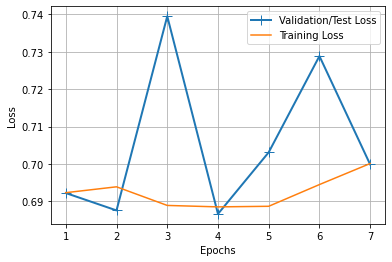

In [50]:
# Plotting our loss charts
import matplotlib.pyplot as plt
history_dict=history.history
loss_values=history_dict['loss']
val_loss_values=history_dict['val_loss']
epochs=range(1,len(loss_values)+1)
line1=plt.plot(epochs,val_loss_values,label='Validation/Test Loss')
line2=plt.plot(epochs,loss_values,label='Training Loss')
plt.setp(line1,linewidth=2.0,marker='+',markersize=10.0)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.grid(True)
plt.legend()
plt.show()

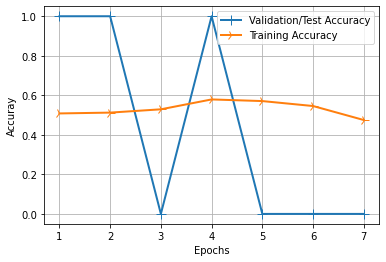

In [51]:
# Plotting accuracy Charts
history_dict=history.history
acc_values=history_dict['accuracy']
val_acc_values=history_dict['val_accuracy']
epochs=range(1,len(loss_values)+1)
line1=plt.plot(epochs,val_acc_values,label='Validation/Test Accuracy')
line2=plt.plot(epochs,acc_values,label='Training Accuracy')
plt.setp(line1,linewidth=2.0,marker='+',markersize=10.0)
plt.setp(line2,linewidth=2.0,marker='4',markersize=10.0)
plt.xlabel('Epochs')
plt.ylabel('Accuray')
plt.grid(True)
plt.legend()
plt.show()